In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('supermarket.csv', sep=',')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [24]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

In [25]:
# Проверка наличия пропусков
missing_values = df.isnull().any().any()
print(missing_values)

False


In [26]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [30]:
income_by_city = df.groupby('City')['gross income'].sum()
income_by_city

City
Mandalay     5057.2220
Naypyitaw    5265.1765
Yangon       5057.3505
Name: gross income, dtype: float64

In [33]:
df_grouped = df.groupby(['Date', 'City'])['gross income'].sum().reset_index()
df_grouped

,Date,City,gross income
0,2019-01-01,Mandalay,73.1760
1,2019-01-01,Naypyitaw,39.8650
2,2019-01-01,Yangon,112.9200
3,2019-01-02,Mandalay,55.3715
4,2019-01-02,Naypyitaw,22.6500
...,...,...,...
258,2019-03-29,Naypyitaw,46.9380
259,2019-03-29,Yangon,46.5530
260,2019-03-30,Mandalay,82.1170
261,2019-03-30,Naypyitaw,68.6660


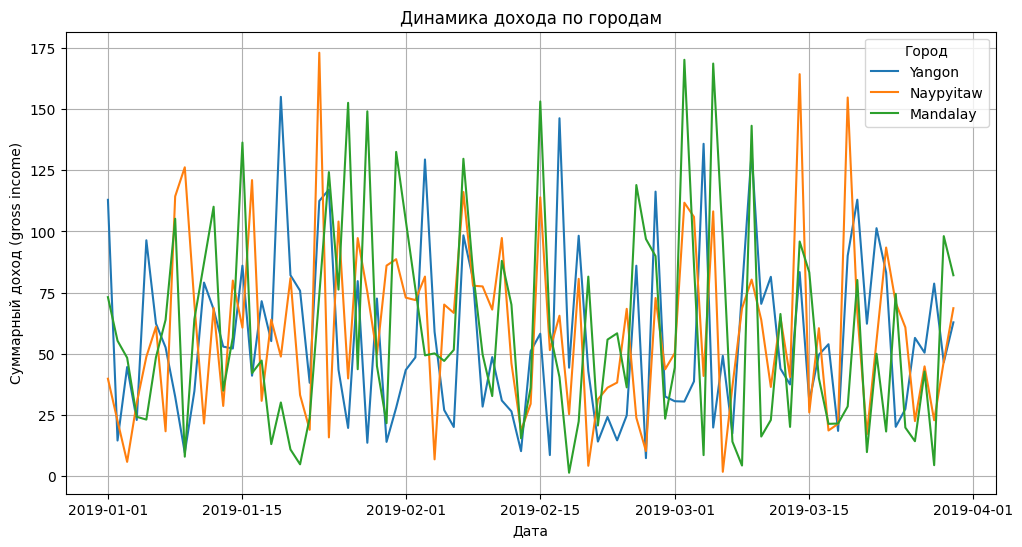

In [34]:
plt.figure(figsize=(12,6))

for city in df['City'].unique():
    city_data = df_grouped[df_grouped['City'] == city]
    plt.plot(city_data['Date'], city_data['gross income'], label=city)
    plt.title('Динамика дохода по городам')

plt.xlabel('Дата')
plt.ylabel('Суммарный доход (gross income)')
plt.legend(title='Город')
plt.grid()
plt.show()

In [35]:
df['Week'] = df['Date'].dt.week
df['Week'] 

/var/folders/8_/y936460960110gnpk46t3fw00000gn/T/ipykernel_32015/1573474004.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


0       1
1      10
2       9
3       4
4       6
       ..
995     5
996     9
997     6
998     8
999     8
Name: Week, Length: 1000, dtype: int64

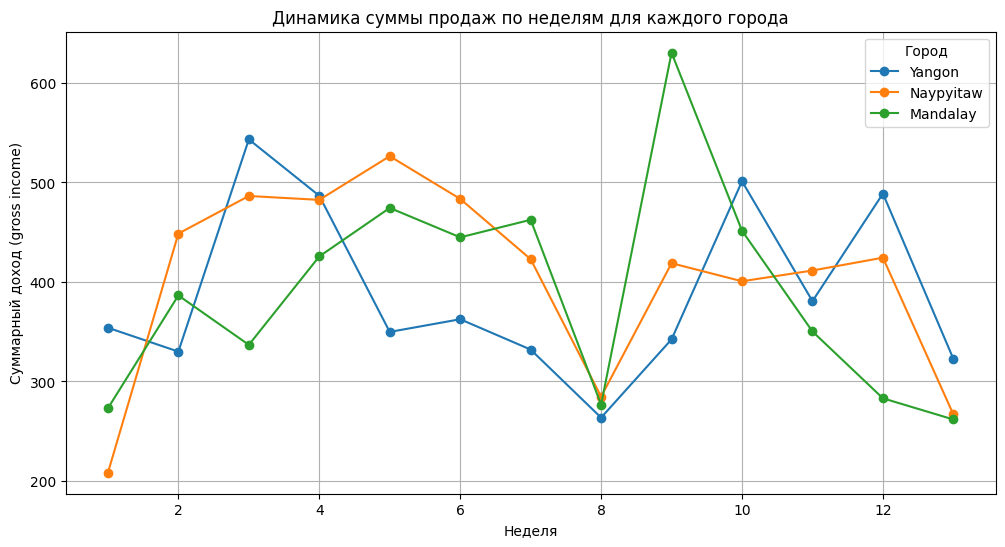

In [36]:
# Группировка данных для расчета суммарного дохода по неделям для каждого города
weekly_sales = df.groupby(['Week', 'City'])['gross income'].sum().reset_index()

# Построение графика динамики дохода по неделям
plt.figure(figsize=(12, 6))
for city in df['City'].unique():
    city_weekly = weekly_sales[weekly_sales['City'] == city]
    plt.plot(city_weekly['Week'], city_weekly['gross income'], marker='o', label=city)

plt.title('Динамика суммы продаж по неделям для каждого города')
plt.xlabel('Неделя')
plt.ylabel('Суммарный доход (gross income)')
plt.legend(title='Город')
plt.grid()
plt.show()

In [39]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,1900-01-01 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,1900-01-01 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,1900-01-01 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,9
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,1900-01-01 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,1900-01-01 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,6


In [41]:
df.groupby('Product line')['Quantity'].sum()

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

In [42]:
df['Customer type'].value_counts(normalize=True)

Member    0.501
Normal    0.499
Name: Customer type, dtype: float64

In [44]:
round(df.groupby('Payment')['Total'].mean(),2)

Payment
Cash           326.18
Credit card    324.01
Ewallet        318.82
Name: Total, dtype: float64

In [45]:
round(df.groupby(['Week', 'Payment'])['Total'].mean(),2)

Week  Payment    
1     Cash           269.87
      Credit card    391.24
      Ewallet        289.38
2     Cash           386.83
      Credit card    313.02
      Ewallet        309.24
3     Cash           439.59
      Credit card    345.61
      Ewallet        282.20
4     Cash           318.03
      Credit card    332.40
      Ewallet        300.53
5     Cash           304.63
      Credit card    335.62
      Ewallet        396.65
6     Cash           290.68
      Credit card    336.86
      Ewallet        273.40
7     Cash           341.90
      Credit card    408.27
      Ewallet        291.26
8     Cash           311.51
      Credit card    286.40
      Ewallet        265.79
9     Cash           389.31
      Credit card    297.63
      Ewallet        331.74
10    Cash           316.18
      Credit card    352.29
      Ewallet        304.29
11    Cash           311.77
      Credit card    257.63
      Ewallet        348.40
12    Cash           287.86
      Credit card    305.87
  

In [47]:
df = pd.read_csv('Electric Car.csv')
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


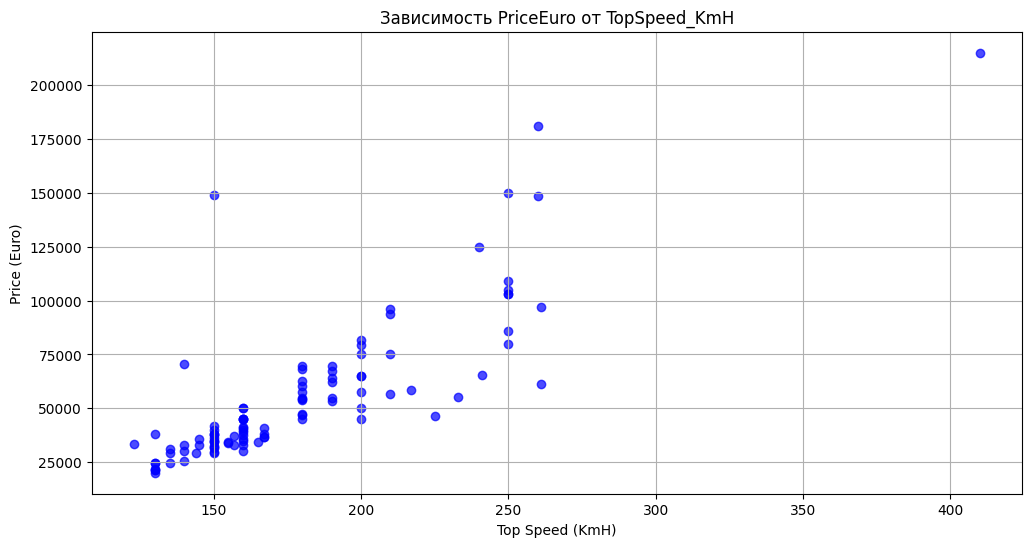

In [52]:
plt.figure(figsize=(12,6))
plt.scatter(df['TopSpeed_KmH'], df['PriceEuro'], c='blue', alpha=0.7)
plt.title('Зависимость PriceEuro от TopSpeed_KmH')
plt.xlabel('Top Speed (KmH)')
plt.ylabel('Price (Euro)')
plt.grid()
plt.show()

In [53]:

from scipy.spatial import ConvexHull
# Выделение точек для построения описывающего многоугольника
points = df[['TopSpeed_KmH', 'PriceEuro']].dropna().values

# Построение выпуклой оболочки
hull = ConvexHull(points)
hull_vertices = hull.vertices  # Вершины описывающего многоугольника

# Вычисление площади описывающего прямоугольника
min_x, min_y = points.min(axis=0)
max_x, max_y = points.max(axis=0)
rectangle_area = (max_x - min_x) * (max_y - min_y)

hull_vertices_count = len(hull_vertices), rectangle_area


In [56]:
hull_vertices_count

(7, 55927977)

In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['BodyStyle_encoded'] = label_encoder.fit_transform(df['BodyStyle'])

In [62]:
sum = df['BodyStyle_encoded'].sum()
cat_count = len(df['BodyStyle_encoded'].value_counts())

In [63]:
cat_count

9